# EDA

## In this phase you will come to know about the charachterstic of the Input Data

### Import the library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import sweetviz as sv
import seaborn as sns


### Import the Dataset

In [ ]:
data = pd.read_csv("heart-disease.csv")  #Enter the dataset

### Profiling Report 

In [ ]:
ProfileReport(data)  

### If you want to Generate the report in html format

In [ ]:
my_report = sv.analyze(data)
my_report.show_html()

## Summary Statistics 

### Show the dataset 

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.info()

In [ ]:
data.dtypes

In [ ]:
data.describe()

In [ ]:
data.corr()

## Visualization of data

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), square=True, annot=True, cmap=plt.cm.RdYlGn, vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation between numerical variables', fontsize=18)

In [ ]:
data.plot.hist(bins=50);

In [ ]:
ax1=data[col].hist()
    title = col
    ax1.set_title(title)
    plt.show()

In [ ]:
data.boxplot();
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:

sns.pairplot(data)

In [ ]:
plt.scatter(data, np.random.normal(7, 0.2, size=data.size), s=1, alpha=0.5)
plt.show();

# Preprocessing 

## Missing Values 

In [ ]:
missing_values_count = data.isnull().sum()

In [ ]:
missing_values_count[0:100]

### How many missing value we have in each column and rows and percentage of missing values


In [ ]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
(total_missing/total_cells) * 100

### Drop the unwanted columns 

In [ ]:
cols = ['ca', 'thal', 'oldpeak'] #Enter the attribute name to be deleted 
data.drop(cols, axis=1,inplace = True)


### Dataset after droping the column and before droping 

In [ ]:
print("Columns in original dataset: %d \n" % data.shape[1])
print("Columns with na's dropped: %d" % data.shape[1])


### Imputations

#### we can impute by using mean , median and mode so in below code you only have to change the operations name 
Categorical variable we use mode to impute while for categorical variable we use mean .
Imputations to be decided on the bussines need.

In [ ]:
#For Numerical variable
data['Enter the column name '].fillna(data['Enter the column name'].mean(), inplace=True)
#for categorical variable
data['Enter the column name '].fillna(data['Enter the column name'].mode()[0], inplace=True)

### Another method of Imputations

In [ ]:
for column in data[['Enter the column name']]:
    mode = data[column].mode()
    data[column] = data[column].fillna(mode)

# converting the categories into numbers using map function


In [ ]:
#for example :data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Column_Name'] = data['Column_name'].map({'attribute_in_column': 0, 'attribute_in_column': 1})

# Normalization

### One hot Encoding

In [ ]:
dummies = []
cols = ['Enter the columns Name']
for col in cols:
    dummies.append(pd.get_dummies(data[col]))
titanic_dummies = pd.concat(dummies, axis=1)
data = pd.concat((data,titanic_dummies), axis=1)

### Normalisation 

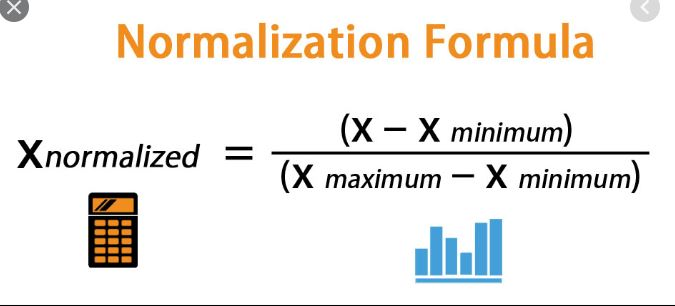

In [ ]:
# bringing variables in the range 0 to 1
data['Dependents']=(data['Dependents']-data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())

In [ ]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:   # indices 1 is actually indepenedent variable and it will vary according to your dataset 
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

### Another_Method

In [ ]:
col_names = ['Enter the Column Name']
features = data[col_names]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

# Import the preprocessed data

In [ ]:
data.to_csv('abcdata.csv', index=False)